This example opens a CZ CryoET Data Portal project dataset and creates an overlay in /tmp.

We then visualize the multiscale segmentation from `segmentation_from_picks` to confirm that it is valid.

In [1]:
import copick

# proj = copick.from_czcdp_datasets([10440], overlay_root="/tmp/test/", output_path='test.config', user_id='icequeen', session_id='0', overlay_fs_args={"auto_mkdir": True})
proj = copick.from_string("""{
    "config_type": "cryoet_data_portal",
    "name": "polnet",
    "description": "A Data Portal project.",
    "version": "1.0.0",

    "pickable_objects": [
        {
            "name": "apo-ferritin",
            "go_id": "GO:0070288",
            "is_particle": true,
            "pdb_id": "4V1W",
            "label": 1,
            "color": [  0, 117, 220, 128],
            "radius": 60,
            "map_threshold": 0.0418
        },
        {
            "name": "beta-amylase",
            "go_id": "UniProtKB:P10537",
            "is_particle": true,
            "pdb_id": "1FA2",
            "label": 2,
            "color": [153,  63,   0, 128],
            "radius": 65,
            "map_threshold": 0.035
        },
        {
            "name": "beta-galactoside",
            "go_id": "UniProtKB:P00722",
            "is_particle": true,
            "pdb_id": "6X1Q",
            "label": 3,
            "color": [ 76,   0,  92, 128],
            "radius": 90,
            "map_threshold": 0.0578
        },
        {
            "name": "ribosome",
            "go_id": "GO:0022626",
            "is_particle": true,
            "pdb_id": "6EK0",
            "label": 4,
            "color": [  0,  92,  49, 128],
            "radius": 150,
            "map_threshold": 0.0374
        },
        {
            "name": "thyroglobulin",
            "go_id": "UniProtKB:P01267",
            "is_particle": true,
            "pdb_id": "6SCJ",
            "label": 5,
            "color": [ 43, 206,  72, 128],
            "radius": 130,
            "map_threshold": 0.0278
        },
        {
            "name": "virus-like particle",
            "go_id": "GO:0170047",
            "is_particle": true,
            "pdb_id": "6N4V",            
            "label": 6,
            "color": [255, 204, 153, 128],
            "radius": 135,
            "map_threshold": 0.201
        }
    ],

    "overlay_root": "/tmp/overlay",

    "overlay_fs_args": {
        "auto_mkdir": true
    },

    "dataset_ids": [10441]
}
""")

print(proj.pickable_objects)

{'auto_mkdir': True}
[CopickObject(name=apo-ferritin, is_particle=True, label=1, color=(0, 117, 220, 128), emdb_id=None, pdb_id=4V1W, identifier=GO:0070288 threshold=0.0418) at 0x13d7ec760, CopickObject(name=beta-amylase, is_particle=True, label=2, color=(153, 63, 0, 128), emdb_id=None, pdb_id=1FA2, identifier=UniProtKB:P10537 threshold=0.035) at 0x13df0d030, CopickObject(name=beta-galactoside, is_particle=True, label=3, color=(76, 0, 92, 128), emdb_id=None, pdb_id=6X1Q, identifier=UniProtKB:P00722 threshold=0.0578) at 0x13de91e10, CopickObject(name=ribosome, is_particle=True, label=4, color=(0, 92, 49, 128), emdb_id=None, pdb_id=6EK0, identifier=GO:0022626 threshold=0.0374) at 0x13df84d90, CopickObject(name=thyroglobulin, is_particle=True, label=5, color=(43, 206, 72, 128), emdb_id=None, pdb_id=6SCJ, identifier=UniProtKB:P01267 threshold=0.0278) at 0x13df84e20, CopickObject(name=virus-like particle, is_particle=True, label=6, color=(255, 204, 153, 128), emdb_id=None, pdb_id=6N4V, iden

In [2]:
pickable_object = proj.pickable_objects[0]
radius = pickable_object.radius
painting_segmentation_name = "ribosomeTest"
run = proj.runs[0]
voxel_spacing = 10
tomo_type = "wbp"
pick_set = run.get_picks(object_name="ribosome")[0]
pick_set

CopickPicks(pickable_object_name=ribosome, user_id=data-portal, session_id=74238, len(points)=148) at 0x13e0171c0

In [3]:
from copick_utils.segmentation.segmentation_from_picks import segmentation_from_picks


seg = segmentation_from_picks(radius, painting_segmentation_name, run, voxel_spacing, tomo_type, pickable_object, pick_set, user_id="paintedPicks", session_id="0")



[DEBUG] radius_voxel: 6.0, radius: 60.0, voxel_spacing: 10, label_value: 1
[DEBUG] Segmentation volume shape (Z, Y, X): 200, 630, 630
[DEBUG] Processing pick 0: x=2818.199998, y=4821.655733, z=395.048664 (voxel units: x=281.8199998, y=482.16557329999995, z=39.5048664)
[DEBUG] Processing pick 1: x=2897.4021649999995, y=5074.954878, z=429.866548 (voxel units: x=289.7402165, y=507.4954878, z=42.986654800000004)
[DEBUG] Processing pick 2: x=3300.9220240000004, y=4973.293563, z=436.48151900000005 (voxel units: x=330.0922024, y=497.32935630000003, z=43.6481519)
[DEBUG] Processing pick 3: x=3428.272207, y=4920.183642, z=719.187979 (voxel units: x=342.8272207, y=492.0183642, z=71.9187979)
[DEBUG] Processing pick 4: x=3729.010298, y=4800.538657, z=889.768595 (voxel units: x=372.9010298, y=480.0538657, z=88.9768595)
[DEBUG] Processing pick 5: x=3851.4144459999998, y=4622.0709, z=509.944604 (voxel units: x=385.1414446, y=462.20709, z=50.9944604)
[DEBUG] Processing pick 6: x=3961.8227960000004, y=

In [4]:
import zarr

import numpy as np

z = zarr.open(seg.zarr().path, "r")

print([(z[k], np.min(z[k][:]), np.max(z[k][:])) for k in ["0", "1", "2"]])

[(<zarr.core.Array '/0' (200, 630, 630) uint16 read-only>, 0, 1), (<zarr.core.Array '/1' (100, 315, 315) uint16 read-only>, 0, 1), (<zarr.core.Array '/2' (50, 158, 158) uint16 read-only>, 0, 1)]


In [5]:
np.max(z["0"][:])

1

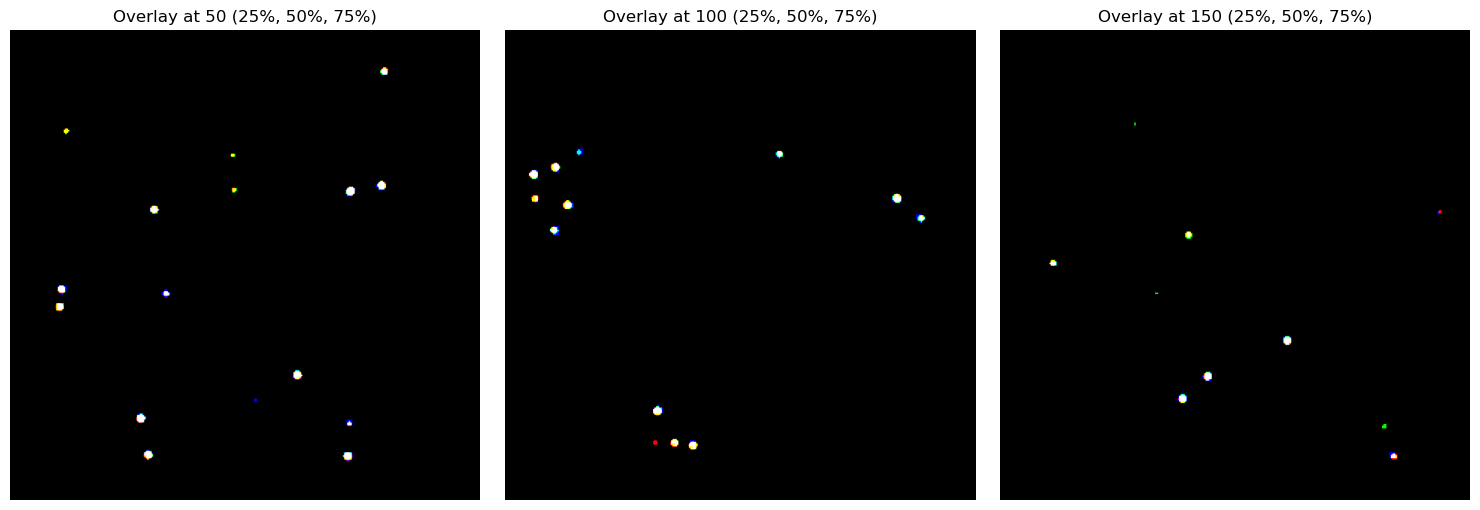

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

# Load the Zarr arrays
zarr_arrays = [z["0"][:], z["1"][:], z["2"][:]]

# Define the dimensions of the highest resolution scale
target_shape = zarr_arrays[0].shape

# Fetch scale factors for each level
scales = [1, 2, 4]# TODO manual hard coding, fix this

# Calculate slice indices for the highest resolution
slice_indices = [int(target_shape[0] * frac) for frac in [0.25, 0.5, 0.75]]
scaled_slice_indices = [[int(slice_idx / scale) for slice_idx in slice_indices] for scale in scales]

# Adjust contrast by scaling each slice to its min and max values
def adjust_contrast(slice_data):
    """Normalize the contrast of a 2D slice."""
    min_val, max_val = slice_data.min(), slice_data.max()
    if max_val > min_val:  # Avoid division by zero
        return (slice_data - min_val) / (max_val - min_val)
    else:
        return slice_data

# Rescale lower resolution arrays to match the highest resolution
rescaled_arrays = [
    resize(arr, target_shape, order=0, preserve_range=True).astype(np.float32)
    for arr in zarr_arrays
]

# Plot the combined overlays for 25%, 50%, and 75% slices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ["red", "green", "blue"]  # Colors for each scale

for i, slice_idx in enumerate(slice_indices):
    # Initialize an RGB image with zeros
    rgb_image = np.zeros((*target_shape[1:], 3), dtype=np.float32)
    
    # Combine slices from different scales into RGB channels
    for j, (arr, color) in enumerate(zip(rescaled_arrays, colors)):
        slice_data = arr[slice_idx]  # Use the same slice index since it's rescaled
        adjusted_slice = adjust_contrast(slice_data)
        
        if color == "red":
            rgb_image[..., 0] += adjusted_slice
        elif color == "green":
            rgb_image[..., 1] += adjusted_slice
        elif color == "blue":
            rgb_image[..., 2] += adjusted_slice
    
    # Normalize the RGB channels to keep the values in the range [0, 1]
    rgb_image = np.clip(rgb_image, 0, 1)
    
    # Plot the resulting RGB overlay
    axes[i].imshow(rgb_image)
    axes[i].set_title(f"Overlay at {slice_idx} (25%, 50%, 75%)")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

